# ГлавРосГосНефть

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импортируем библиотеки.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

Подгружаем файлы.

In [47]:
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    ! gdown --id 1dm9Di_rTM6Y_vMStKtr0Db_7uU71973w
    df_0 = pd.read_csv('/content/geo_data_0.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dm9Di_rTM6Y_vMStKtr0Db_7uU71973w
To: /content/geo_data_0.csv
100% 8.21M/8.21M [00:00<00:00, 141MB/s]


In [48]:
try:
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    ! gdown --id 1GBZuhsiovVDZT-XqN1zqBHuSWIB2JeZL
    df_1 = pd.read_csv('/content/geo_data_1.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GBZuhsiovVDZT-XqN1zqBHuSWIB2JeZL
To: /content/geo_data_1.csv
100% 8.03M/8.03M [00:00<00:00, 147MB/s]


In [49]:
try:
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    ! gdown --id 1GaKWhALkVO9xD-eH4H_fAUtORlMuT7ln
    df_2 = pd.read_csv('/content/geo_data_2.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GaKWhALkVO9xD-eH4H_fAUtORlMuT7ln
To: /content/geo_data_2.csv
100% 8.19M/8.19M [00:00<00:00, 91.7MB/s]


Убираем длинные циферки.

In [50]:
pd.set_option('display.float_format', '{:,.3f}'.format)

 Смотрим таблички.

In [51]:
display(df_0.columns)
print()
display(df_0)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

,id,f0,f1,f2,product
0,txEyH,0.706,-0.498,1.221,105.280
1,2acmU,1.335,-0.340,4.365,73.038
2,409Wp,1.023,0.152,1.420,85.266
3,iJLyR,-0.032,0.139,2.979,168.621
4,Xdl7t,1.988,0.155,4.752,154.037
...,...,...,...,...,...
99995,DLsed,0.972,0.371,6.075,110.744
99996,QKivN,1.392,-0.383,1.274,122.347
99997,3rnvd,1.030,0.019,-1.348,64.375
99998,7kl59,0.998,-0.529,1.584,74.041


In [52]:
display(df_1.columns)
print()
display(df_1)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

,id,f0,f1,f2,product
0,kBEdx,-15.001,-8.276,-0.006,3.179
1,62mP7,14.272,-3.475,0.999,26.953
2,vyE1P,6.263,-5.948,5.001,134.766
3,KcrkZ,-13.081,-11.506,4.999,137.945
4,AHL4O,12.702,-8.147,5.004,134.766
...,...,...,...,...,...
99995,QywKC,9.536,-6.878,1.998,53.907
99996,ptvty,-10.161,-12.558,5.006,137.945
99997,09gWa,-7.379,-3.084,4.999,137.945
99998,rqwUm,0.666,-6.153,1.000,30.132


In [53]:
display(df_2.columns)
print()
display(df_2)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

,id,f0,f1,f2,product
0,fwXo0,-1.147,0.963,-0.829,27.759
1,WJtFt,0.263,0.270,-2.530,56.070
2,ovLUW,0.195,0.289,-5.586,62.872
3,q6cA6,2.236,-0.554,0.930,114.573
4,WPMUX,-0.516,1.716,5.899,149.601
...,...,...,...,...,...
99995,4GxBu,-1.777,1.125,6.263,172.327
99996,YKFjq,-1.262,-0.895,2.525,138.749
99997,tKPY3,-1.200,-2.958,5.219,157.080
99998,nmxp2,-2.420,2.417,-5.548,51.795


### Описание данных

	• id — уникальный идентификатор скважины;
	• f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
	• product — объём запасов в скважине (тыс. баррелей).


### Условия задачи

	• Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
	• При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
	• Бюджет на разработку скважин в регионе — 10 млрд рублей.
	• При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
	• После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### Инфо. Пропуски. Описание.

Посмотрим заполненость таблицы df_0.

In [54]:
print('\nИнфо:')
print(df_0.info())                             # сколько значений и в каком формате
print('\nПропусков:')
print(df_0.isna().mean())                      # подсчёт пропусков в долях (перевод в % - лишний код)
print('\nОписание:')
display(df_0.describe())                       # вдруг чего "на глазок" проявится 
print('\nДубликатов =', df_0.duplicated().sum()) # проверим дубликаты


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Пропусков:
id        0.000
f0        0.000
f1        0.000
f2        0.000
product   0.000
dtype: float64

Описание:


,f0,f1,f2,product
count,"100,000.000","100,000.000","100,000.000","100,000.000"
mean,0.500,0.250,2.503,92.500
std,0.872,0.504,3.248,44.289
min,-1.409,-0.848,-12.088,0.000
25%,-0.073,-0.201,0.288,56.498
50%,0.502,0.250,2.516,91.850
75%,1.074,0.701,4.715,128.564
max,2.362,1.344,16.004,185.364



Дубликатов = 0


Посмотрим заполненость таблицы df_1.

In [55]:
print('\nИнфо:')
print(df_1.info())
print('\nПропусков:')
print(df_1.isna().mean())
print('\ndescribe:')
display(df_1.describe())
print('\nДубликатов =', df_1.duplicated().sum())


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Пропусков:
id        0.000
f0        0.000
f1        0.000
f2        0.000
product   0.000
dtype: float64

describe:


,f0,f1,f2,product
count,"100,000.000","100,000.000","100,000.000","100,000.000"
mean,1.141,-4.797,2.495,68.825
std,8.966,5.120,1.704,45.944
min,-31.610,-26.359,-0.018,0.000
25%,-6.299,-8.268,1.000,26.953
50%,1.153,-4.813,2.011,57.086
75%,8.621,-1.333,4.000,107.813
max,29.422,18.734,5.020,137.945



Дубликатов = 0


Посмотрим заполненость таблицы df_2.

In [56]:
print('\nИнфо:')
print(df_2.info())
print('\nПропусков:')
print(df_2.isna().mean())
print('\ndescribe:')
display(df_2.describe())
print('\nДубликатов =', df_2.duplicated().sum())


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Пропусков:
id        0.000
f0        0.000
f1        0.000
f2        0.000
product   0.000
dtype: float64

describe:


,f0,f1,f2,product
count,"100,000.000","100,000.000","100,000.000","100,000.000"
mean,0.002,-0.002,2.495,95.000
std,1.732,1.730,3.473,44.750
min,-8.760,-7.084,-11.970,0.000
25%,-1.162,-1.175,0.130,59.450
50%,0.009,-0.009,2.484,94.926
75%,1.159,1.164,4.859,130.595
max,7.238,7.845,16.739,190.030



Дубликатов = 0


### Предобработка данных

Поищем артефакты в значениях:

'f0 в df_0:'

array([-1.40860531, -1.35177299, -1.30222711, ...,  2.33375269,
        2.33707957,  2.36233081])

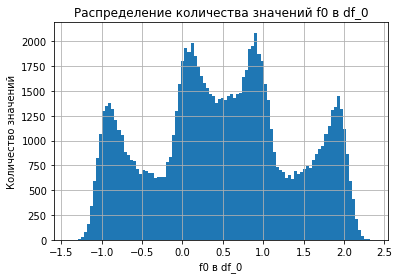

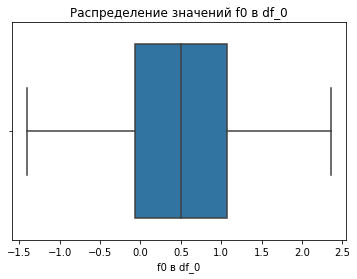

In [57]:
display('f0 в df_0:', df_0['f0'].sort_values().unique())
print()
display(df_0['f0'].hist(bins=100))
plt.title("Распределение количества значений f0 в df_0")
plt.xlabel("f0 в df_0")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_0,
                         x = 'f0',
                         orient = 'h'))
plt.title("Распределение значений f0 в df_0")
plt.xlabel("f0 в df_0")
plt.show()

'f1 в df_0:'

array([-0.8482185 , -0.84490792, -0.8205609 , ...,  1.33334561,
        1.33482762,  1.34376933])

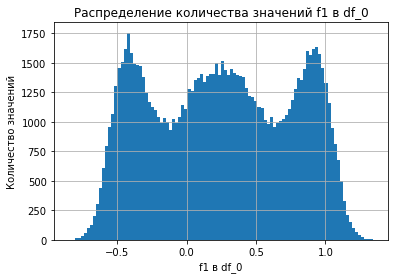

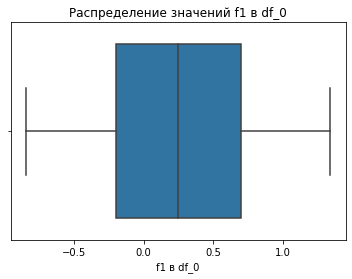

In [58]:
display('f1 в df_0:', df_0['f1'].sort_values().unique())
print()
display(df_0['f1'].hist(bins=100))
plt.title("Распределение количества значений f1 в df_0")
plt.xlabel("f1 в df_0")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_0,
                         x = 'f1',
                         orient = 'h'))
plt.title("Распределение значений f1 в df_0")
plt.xlabel("f1 в df_0")
plt.show()

'f2 в df_0:'

array([-12.08832812, -10.13834135, -10.13817115, ...,  15.23032159,
        15.42837187,  16.00379001])

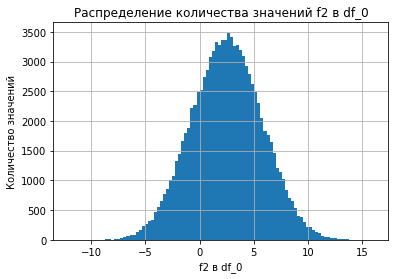

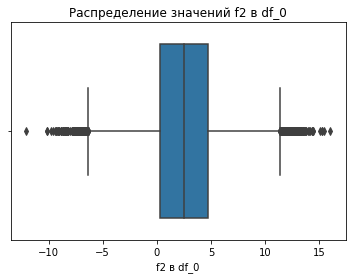

In [59]:
display('f2 в df_0:', df_0['f2'].sort_values().unique())
print()
display(df_0['f2'].hist(bins=100))
plt.title("Распределение количества значений f2 в df_0")
plt.xlabel("f2 в df_0")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_0,
                         x = 'f2',
                         orient = 'h'))
plt.title("Распределение значений f2 в df_0")
plt.xlabel("f2 в df_0")
plt.show()

'product в df_0:'

array([0.00000000e+00, 4.02152316e-03, 6.11363631e-03, ...,
       1.85355615e+02, 1.85362690e+02, 1.85364347e+02])

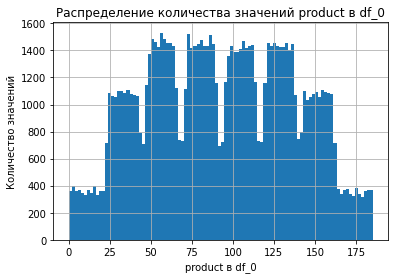

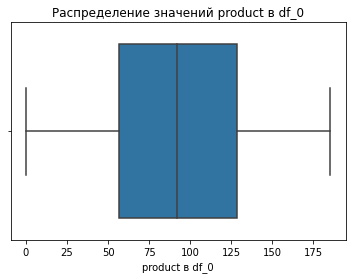

In [60]:
display('product в df_0:', df_0['product'].sort_values().unique())
print()
display(df_0['product'].hist(bins=100))
plt.title("Распределение количества значений product в df_0")
plt.xlabel("product в df_0")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_0,
                         x = 'product',
                         orient = 'h'))
plt.title("Распределение значений product в df_0")
plt.xlabel("product в df_0")
plt.show()

'f0 в df_1:'

array([-31.60957602, -27.82961614, -26.64625507, ...,  28.93082879,
        29.25906208,  29.42175461])

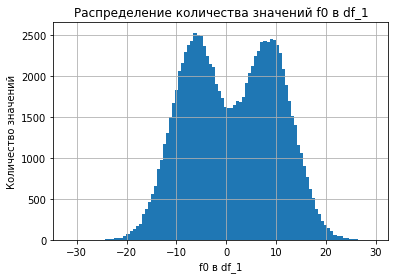

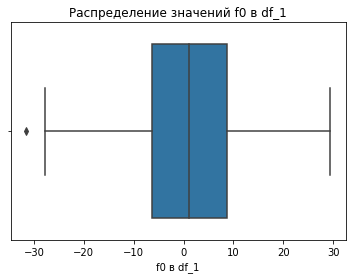

In [61]:
display('f0 в df_1:', df_1['f0'].sort_values().unique())
print()
display(df_1['f0'].hist(bins=100))
plt.title("Распределение количества значений f0 в df_1")
plt.xlabel("f0 в df_1")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_1,
                         x = 'f0',
                         orient = 'h'))
plt.title("Распределение значений f0 в df_1")
plt.xlabel("f0 в df_1")
plt.show()

'f1 в df_1:'

array([-26.35859801, -25.38962242, -25.2915177 , ...,  16.0268693 ,
        16.7371962 ,  18.73406263])

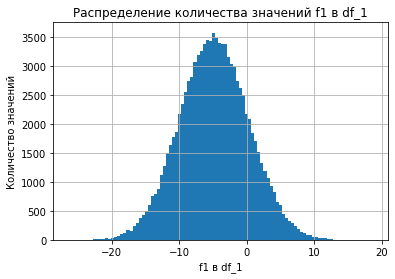

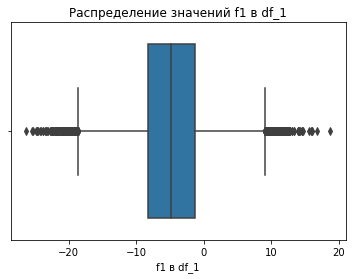

In [62]:
display('f1 в df_1:', df_1['f1'].sort_values().unique())
print()
display(df_1['f1'].hist(bins=100))
plt.title("Распределение количества значений f1 в df_1")
plt.xlabel("f1 в df_1")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_1,
                         x = 'f1',
                         orient = 'h'))
plt.title("Распределение значений f1 в df_1")
plt.xlabel("f1 в df_1")
plt.show()

'f2 в df_1:'

array([-0.01814409, -0.01788668, -0.01768626, ...,  5.01750345,
        5.01909142,  5.01972056])

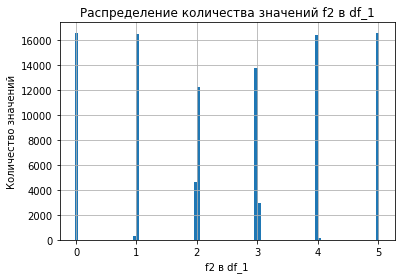

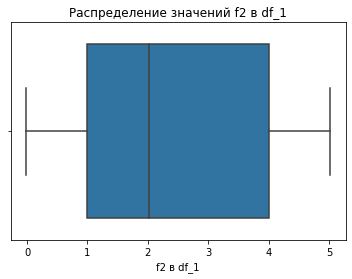

In [63]:
display('f2 в df_1:', df_1['f2'].sort_values().unique())
print()
display(df_1['f2'].hist(bins=100))
plt.title("Распределение количества значений f2 в df_1")
plt.xlabel("f2 в df_1")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_1,
                         x = 'f2',
                         orient = 'h'))
plt.title("Распределение значений f2 в df_1")
plt.xlabel("f2 в df_1")
plt.show()

'product в df_1:'

array([  0.        ,   3.17910258,  26.95326103,  30.13236361,
        53.90652206,  57.08562465,  80.85978309,  84.03888568,
       107.81304413, 110.99214671, 134.76630516, 137.94540774])

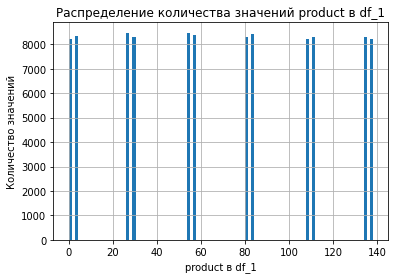

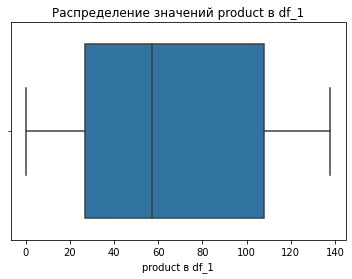

In [64]:
display('product в df_1:', df_1['product'].sort_values().unique())
print()
display(df_1['product'].hist(bins=100))
plt.title("Распределение количества значений product в df_1")
plt.xlabel("product в df_1")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_1,
                         x = 'product',
                         orient = 'h'))
plt.title("Распределение значений product в df_1")
plt.xlabel("product в df_1")
plt.show()

'f0 в df_2:'

array([-8.76000362, -7.45058711, -7.18949804, ...,  7.19461485,
        7.21552717,  7.23826248])

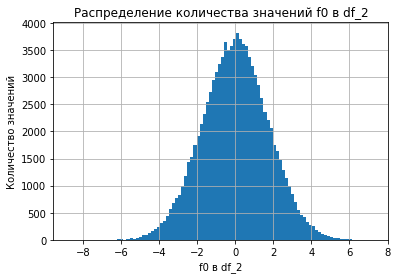

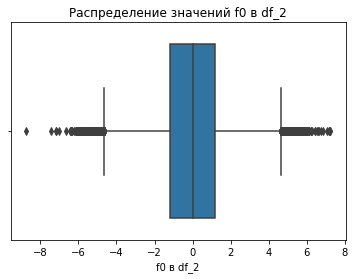

In [65]:
display('f0 в df_2:', df_2['f0'].sort_values().unique())
print()
display(df_2['f0'].hist(bins=100))
plt.title("Распределение количества значений f0 в df_2")
plt.xlabel("f0 в df_2")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_2,
                         x = 'f0',
                         orient = 'h'))
plt.title("Распределение значений f0 в df_2")
plt.xlabel("f0 в df_2")
plt.show()

'f1 в df_2:'

array([-7.08401976, -6.74835677, -6.73299712, ...,  7.10161842,
        7.76185714,  7.84480127])

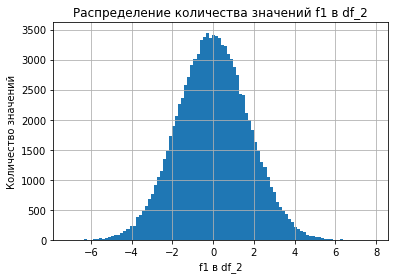

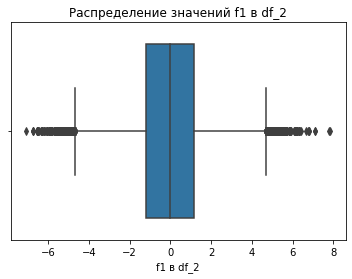

In [66]:
display('f1 в df_2:', df_2['f1'].sort_values().unique())
print()
display(df_2['f1'].hist(bins=100))
plt.title("Распределение количества значений f1 в df_2")
plt.xlabel("f1 в df_2")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_2,
                         x = 'f1',
                         orient = 'h'))
plt.title("Распределение значений f1 в df_2")
plt.xlabel("f1 в df_2")
plt.show()

'f2 в df_2:'

array([-11.97033454, -11.61169048, -11.40724351, ...,  16.31301122,
        16.35764509,  16.73940206])

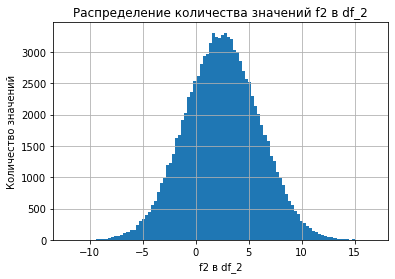

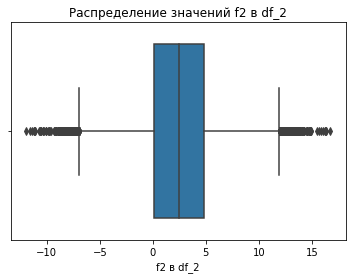

In [67]:
display('f2 в df_2:', df_2['f2'].sort_values().unique())
print()
display(df_2['f2'].hist(bins=100))
plt.title("Распределение количества значений f2 в df_2")
plt.xlabel("f2 в df_2")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_2,
                         x = 'f2',
                         orient = 'h'))
plt.title("Распределение значений f2 в df_2")
plt.xlabel("f2 в df_2")
plt.show()

'product в df_2:'

array([0.00000000e+00, 4.60600004e-03, 9.20411196e-03, ...,
       1.90011722e+02, 1.90013589e+02, 1.90029838e+02])

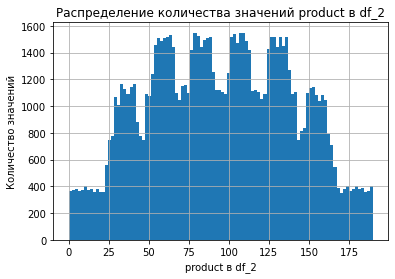

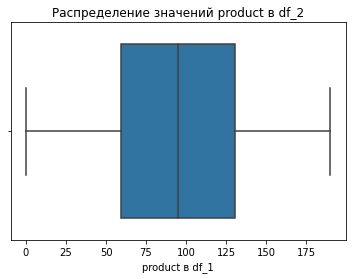

In [68]:
display('product в df_2:', df_2['product'].sort_values().unique())
print()
display(df_2['product'].hist(bins=100))
plt.title("Распределение количества значений product в df_2")
plt.xlabel("product в df_2")
plt.ylabel("Количество значений")
plt.show()
display(ax = sns.boxplot(data = df_2,
                         x = 'product',
                         orient = 'h'))
plt.title("Распределение значений product в df_2")
plt.xlabel("product в df_1")
plt.show()

##### Вывод

- Количество записей по 100000.
- Пропусков данных нет.
- Дубликатов не имеется.
- Распределение значений `f2` и `product` в `df_1` явно выделяется на фоне остальных.
- Артефактов в данных не обнаружено.

## Обучение и проверка модели для каждого региона

Зафиксируем некоторые константы.

In [69]:
random_state = 1980
cv=5

Делим таблички на train (75%), valid (25%).

In [70]:
features_0 = df_0.drop(['product', 'id'],
                       axis=1)
target_0 = df_0['product']                       # будем прогнозировать объём запасов в скважине
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0,
                                                                                      target_0, 
                                                                                      test_size=0.25, 
                                                                                      random_state=random_state)
features_1 = df_1.drop(['product', 'id'],
                       axis=1)
target_1 = df_1['product']
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1,
                                                                                      target_1, 
                                                                                      test_size=0.25, 
                                                                                      random_state=random_state)
features_2 = df_2.drop(['product', 'id'],
                       axis=1)
target_2 = df_2['product']
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
                                                                        features_2, target_2, 
                                                                        test_size=0.25, 
                                                                        random_state=random_state)

### LinearRegression

In [71]:
model_0 = LinearRegression()
model_0.fit(features_train_0,
            target_train_0)
predictions_valid_0 = model_0.predict(features_valid_0)

result_0 = (mean_squared_error(target_valid_0, predictions_valid_0))** (0.5)
scores_0 = cross_val_score(model_0,
                           features_0,
                           target_0,
                           cv=cv)
final_score_0 = final_score = sum(scores_0) / len(scores_0)   # cредняя оценка качества модели

df_valid_0 = pd.DataFrame(zip(target_valid_0))                # target и predictions в табличку для дальнейшей работы
df_valid_0 = df_valid_0.rename(columns={0: 'target_valid_0'}) # меняем дурное название столбца
df_valid_0["predictions_valid_0"] = predictions_valid_0

print("\nСредний запас предсказанного сырья в df_0:", float('{:.3f}'.format(predictions_valid_0.mean())))
print("RMSE модели model_0:", float('{:.3f}'.format(result_0)))
print("Средняя оценка качества модели model_0:", float('{:.3f}'.format(final_score_0)))



model_1 = LinearRegression()
model_1.fit(features_train_1,
            target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)

result_1 = (mean_squared_error(target_valid_1, predictions_valid_1))** (0.5)
scores_1 = cross_val_score(model_1,
                           features_1,
                           target_1,
                           cv=cv)
final_score_1 = final_score = sum(scores_1) / len(scores_1)

df_valid_1 = pd.DataFrame(zip(target_valid_1))
df_valid_1 = df_valid_1.rename(columns={0: 'target_valid_1'})
df_valid_1["predictions_valid_1"] = predictions_valid_1

print("\nСредний запас предсказанного сырья в df_1:", float('{:.3f}'.format(predictions_valid_1.mean())))
print("RMSE модели model_1:", float('{:.3f}'.format(result_1)))
print("Средняя оценка качества модели model_1:", float('{:.4f}'.format(final_score_1)))



model_2 = LinearRegression()
model_2.fit(features_train_2,
            target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)

result_2 = (mean_squared_error(target_valid_2, predictions_valid_2))** (0.5)
scores_2 = cross_val_score(model_2,
                           features_2,
                           target_2,
                           cv=cv)
final_score_2 = final_score = sum(scores_2) / len(scores_2)

df_valid_2 = pd.DataFrame(zip(target_valid_2))
df_valid_2 = df_valid_2.rename(columns={0: 'target_valid_2'})
df_valid_2["predictions_valid_2"] = predictions_valid_2

print("\nСредний запас предсказанного сырья в df_2:", float('{:.3f}'.format(predictions_valid_2.mean())))
print("RMSE модели model_2:", float('{:.3f}'.format(result_2)))
print("Средняя оценка качества модели model_2:", float('{:.3f}'.format(final_score_2)))

print()
print(df_valid_0)
print(df_valid_1)
print(df_valid_2)


Средний запас предсказанного сырья в df_0: 92.436
RMSE модели model_0: 37.791
Средняя оценка качества модели model_0: 0.275

Средний запас предсказанного сырья в df_1: 68.901
RMSE модели model_1: 0.89
Средняя оценка качества модели model_1: 0.9996

Средний запас предсказанного сырья в df_2: 95.07
RMSE модели model_2: 40.003
Средняя оценка качества модели model_2: 0.199

       target_valid_0  predictions_valid_0
0             149.754              108.367
1              31.087               82.289
2              27.330               89.768
3              58.987               74.976
4              70.827              127.342
...               ...                  ...
24995         138.777              102.071
24996         125.642              130.023
24997         159.137               92.125
24998         150.455              122.708
24999         111.426               77.861

[25000 rows x 2 columns]
       target_valid_1  predictions_valid_1
0               3.179                3.47

##### Вывод

- Получается, что чем больше запасы тем менее точное предсказание.
- До 180 RMSE считается нормальным и хорошим, так что все модели показали хороший результат, а model_1 вообще отличный.

## Подготовка к расчёту прибыли

Зафиксируем заданные константы.

In [72]:
BUDGET = 10e+09                # бюджет на разработку скважин в регионе
PRODUCT_REVENUE = 450 * 1000   # доход с каждой единицы продукта
POINT = 500                    # точек для исследования региона
BEST_POINT = 200               # точек для разработки в регионе

Минимальный объём запасов в скважине (тыс. баррелей):

In [73]:
product_min = BUDGET / BEST_POINT / PRODUCT_REVENUE

print('\nМинимально необходимый объём запасов в скважине:', float('{:.3f}'.format(product_min)), 'тыс. баррелей')
print("Средний запас предсказанного сырья в регионе  0:", float('{:.3f}'.format(predictions_valid_0.mean())), 'тыс. баррелей')
print("Средний запас предсказанного сырья в регионе  1:", float('{:.3f}'.format(predictions_valid_1.mean())), 'тыс. баррелей')
print("Средний запас предсказанного сырья в регионе  2:", float('{:.3f}'.format(predictions_valid_2.mean())), 'тыс. баррелей')


Минимально необходимый объём запасов в скважине: 111.111 тыс. баррелей
Средний запас предсказанного сырья в регионе  0: 92.436 тыс. баррелей
Средний запас предсказанного сырья в регионе  1: 68.901 тыс. баррелей
Средний запас предсказанного сырья в регионе  2: 95.07 тыс. баррелей


##### Вывод

- По средним показателям наиболее перспективными выглядят регионы `0` и `2`.

## Расчёт прибыли и рисков 

### Расчёт прибыли по выбранным скважинам и предсказаниям модели:

In [86]:
def profit(target_x, predictions_x):
        '''Функция расчёта прибыли по выбранным скважинам и предсказаниям модели'''
        predictions_sorted = predictions_x.sort_values(ascending=False) # сортируем предсказания
        selected = target_x[predictions_sorted.index][:BEST_POINT]      # выбираем ответы через их индексы
        return PRODUCT_REVENUE * selected.sum() - BUDGET                # прибыль для полученного объёма сырья



# df_0
target_valid_0 = df_valid_0['target_valid_0']           # в уникальную переменную, далее пригодится
predictions_valid_0 = df_valid_0['predictions_valid_0'] # в уникальную переменную, далее пригодится
target_0 = target_valid_0.sample(n=POINT, 
                                 replace=False, 
                                 random_state=random_state)
predictions_0 = predictions_valid_0[target_0.index] 
revenue_0 = profit(target_0,
                 predictions_0)
print('\nПрибыль для полученного объёма сырья в регионе 0:', float('{:.2f}'.format(revenue_0)), 'рублей дохода')



# df_1
target_valid_1 = df_valid_1['target_valid_1']
predictions_valid_1 = df_valid_1['predictions_valid_1']
target_1 = target_valid_1.sample(n=POINT, 
                                 replace=False, 
                                 random_state=random_state)
predictions_1 = predictions_valid_1[target_1.index]
revenue_1 = profit(target_1,
                 predictions_1)
print('Прибыль для полученного объёма сырья в регионе 1:', float('{:.2f}'.format(revenue_1)), 'рублей дохода')



# df_2
target_valid_2 = df_valid_2['target_valid_2']
predictions_valid_2 = df_valid_2['predictions_valid_2']
target_2 = target_valid_2.sample(n=POINT, 
                                 replace=False, 
                                 random_state=random_state)
predictions_2 = predictions_valid_2[target_2.index] 
revenue_2 = profit(target_2,
                 predictions_2)
print('Прибыль для полученного объёма сырья в регионе 2:', float('{:.2f}'.format(revenue_2)), 'рублей дохода')
print()


Прибыль для полученного объёма сырья в регионе 0: 632689622.91 рублей дохода
Прибыль для полученного объёма сырья в регионе 1: 353597626.6 рублей дохода
Прибыль для полученного объёма сырья в регионе 2: 356732585.67 рублей дохода



### Риски и прибыль для каждого региона:

- Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [95]:
selection = 1000
quant_down = 0.025
quant_up = 0.975

# df_0
values_0 = []
for i in range(selection):                   # Bootstrap с 1000 выборок
    target_0 = target_valid_0.sample(n=POINT,
                                     replace=False)
    predictions_0 = predictions_valid_0[target_0.index]
    values_0.append(profit(target_0,
                           predictions_0))
values_0 = pd.Series(values_0)
#print(values_0.sort_values())
lower_down_0 = values_0.quantile(quant_down)  # 95%-й доверительный интервал
lower_up_0 = values_0.quantile(quant_up)
mean_0 = values_0.mean()
print("\nСредняя выручка региона 0:", float('{:.2f}'.format(mean_0)), 'рублей дохода')
print("2,5% снизу:", float('{:.2f}'.format(lower_down_0)))
print("2,5% сверху:", float('{:.2f}'.format(lower_up_0)))
print('Вероятность убытков:', float('{:.2f}'.format(values_0[values_0 < 0].count() / selection * 100)),'%')


# df_1
values_1 = []
for i in range(selection):
    target_1 = target_valid_1.sample(n=POINT,
                                     replace=False)
    predictions_1 = predictions_valid_1[target_1.index]
    values_1.append(profit(target_1,
                           predictions_1))
values_1 = pd.Series(values_1)
#print(values_1.sort_values())
lower_down_1 = values_1.quantile(quant_down)
lower_up_1 = values_1.quantile(quant_up)
mean_1 = values_1.mean()
print("\nСредняя выручка региона 1:", float('{:.2f}'.format(mean_1)), 'рублей дохода')
print("2,5% снизу:", float('{:.2f}'.format(lower_down_1)))
print("2,5% сверху:", float('{:.2f}'.format(lower_up_1)))
print('Вероятность убытков:', float('{:.2f}'.format(values_1[values_1 < 0].count() / selection * 100)),'%')


# df_2
values_2 = []
for i in range(selection):
    target_2 = target_valid_2.sample(n=POINT,
                                     replace=False)
    predictions_2 = predictions_valid_2[target_2.index]
    values_2.append(profit(target_2, 
                           predictions_2))
values_2 = pd.Series(values_2)
#print(values_2.sort_values())
lower_down_2 = values_2.quantile(quant_down)
lower_up_2 = values_2.quantile(quant_up)
mean_2 = values_2.mean()
print("\nСредняя выручка региона 2:", float('{:.2f}'.format(mean_2)), 'рублей дохода')
print("2,5% снизу:", float('{:.2f}'.format(lower_down_2)))
print("2,5% сверху:", float('{:.2f}'.format(lower_up_2)))
print('Вероятность убытков:', float('{:.2f}'.format(values_2[values_2 < 0].count() / selection * 100)),'%')


Средняя выручка региона 0: 444473484.37 рублей дохода
2,5% снизу: -47540717.9
2,5% сверху: 917693629.66
Вероятность убытков: 3.7 %

Средняя выручка региона 1: 453258180.06 рублей дохода
2,5% снизу: 62465087.56
2,5% сверху: 855131986.24
Вероятность убытков: 1.5 %

Средняя выручка региона 2: 403711460.44 рублей дохода
2,5% снизу: -109079113.51
2,5% сверху: 934796838.7
Вероятность убытков: 6.1 %


##### Вывод

- Средняя выручка региона 0: 444 млн. руб.
  С вероятностью 95% выручка может быть от -47 до 917 млн. руб.

- Средняя выручка региона 1: 453 млн. руб.
  С вероятностью 95% выручка может быть от 62 до 855 млн. руб.

- Средняя выручка региона 2: 403 млн. руб.
  С вероятностью 95% выручка может быть от -109 до 934 млн. руб.


    Cогласно условиям задачи 
    "После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.
    Среди них выбирают регион с наибольшей средней прибылью." 
    выбраным должен быть регион 1.